In [2]:
import pandas as pd


In [3]:
pd .read_csv("social_media_vs_productivity.csv")

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer

In [5]:
data=pd .read_csv("social_media_vs_productivity.csv")

In [6]:
data.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [9]:
data.shape

(30000, 19)

data cleaning and preprocessing

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values)

Missing values per column:
age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64


In [13]:
# For numeric analysis, select only numeric columns
numeric_df = data.select_dtypes(include=[np.number])

In [16]:
# Impute missing values in numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
numeric_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

In [18]:
# Replace the numeric columns in the original df with the imputed values
data[numeric_df.columns] = numeric_imputed

print('Missing values after imputation:')
print(data.isnull().sum())

Missing values after imputation:
age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64


data visualization 

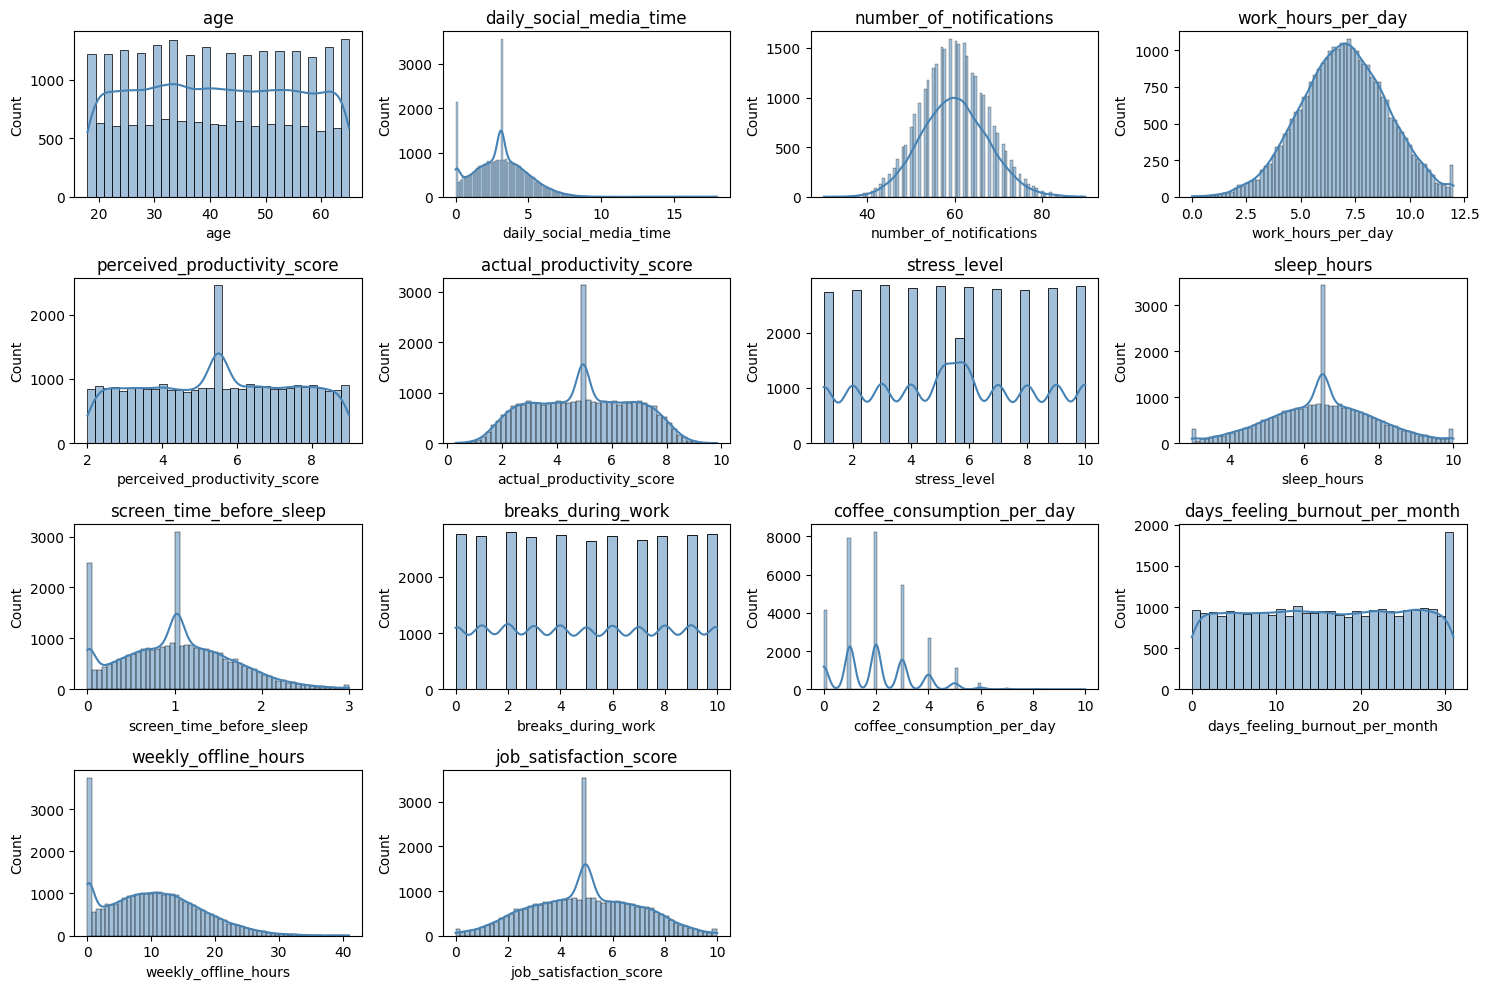

In [20]:
# Histograms for numeric features
numeric_columns = numeric_df.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)  # Adjust grid size as needed
    sns.histplot(data[col], kde=True, color='steelblue')
    plt.title(col)
plt.tight_layout()
plt.show()

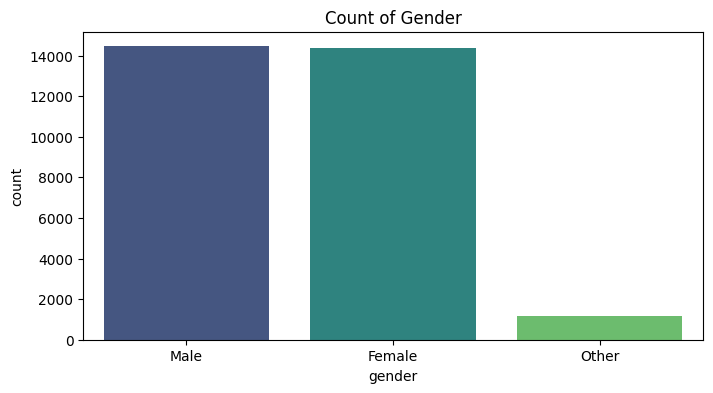

In [22]:
# Count Plot for categorical features (using gender as an example)
plt.figure(figsize=(8, 4))
sns.countplot(x='gender', data=data, palette='viridis')
plt.title('Count of Gender')
plt.show()


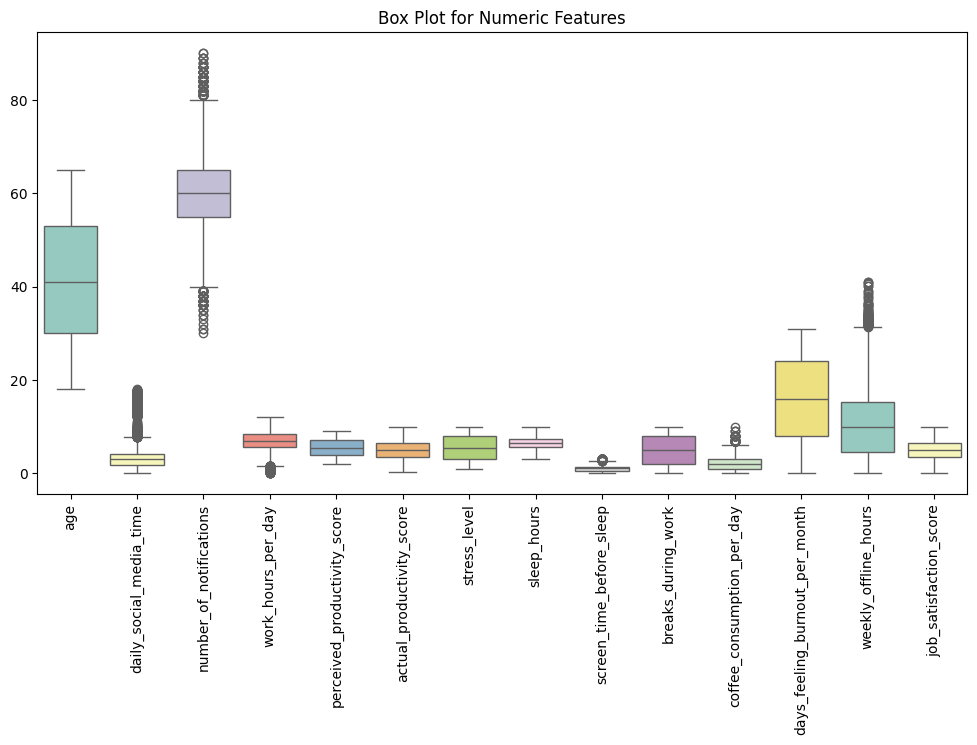

In [24]:

# Box Plot for selected numeric features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns], palette='Set3')
plt.xticks(rotation=90)
plt.title('Box Plot for Numeric Features')
plt.show()

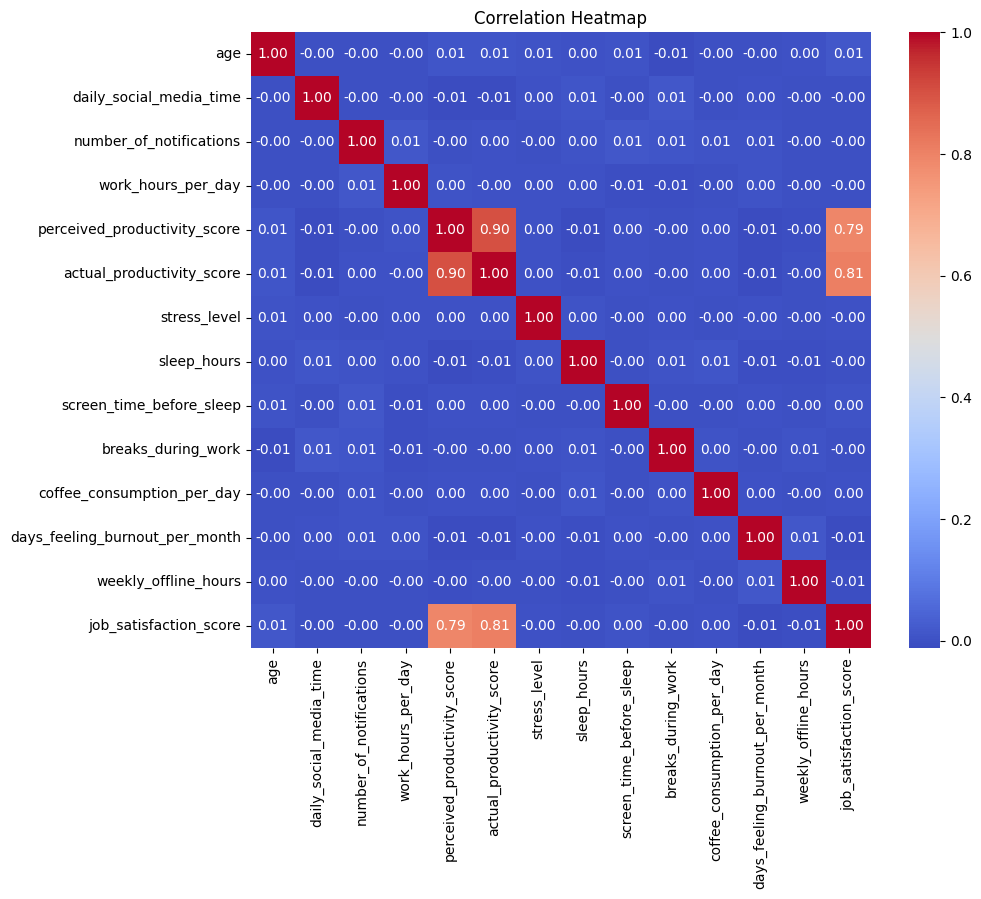

In [26]:
# Correlation Heatmap if there are at least four numeric columns
if len(numeric_columns) >= 4:
    plt.figure(figsize=(10, 8))
    corr = data[numeric_columns].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()


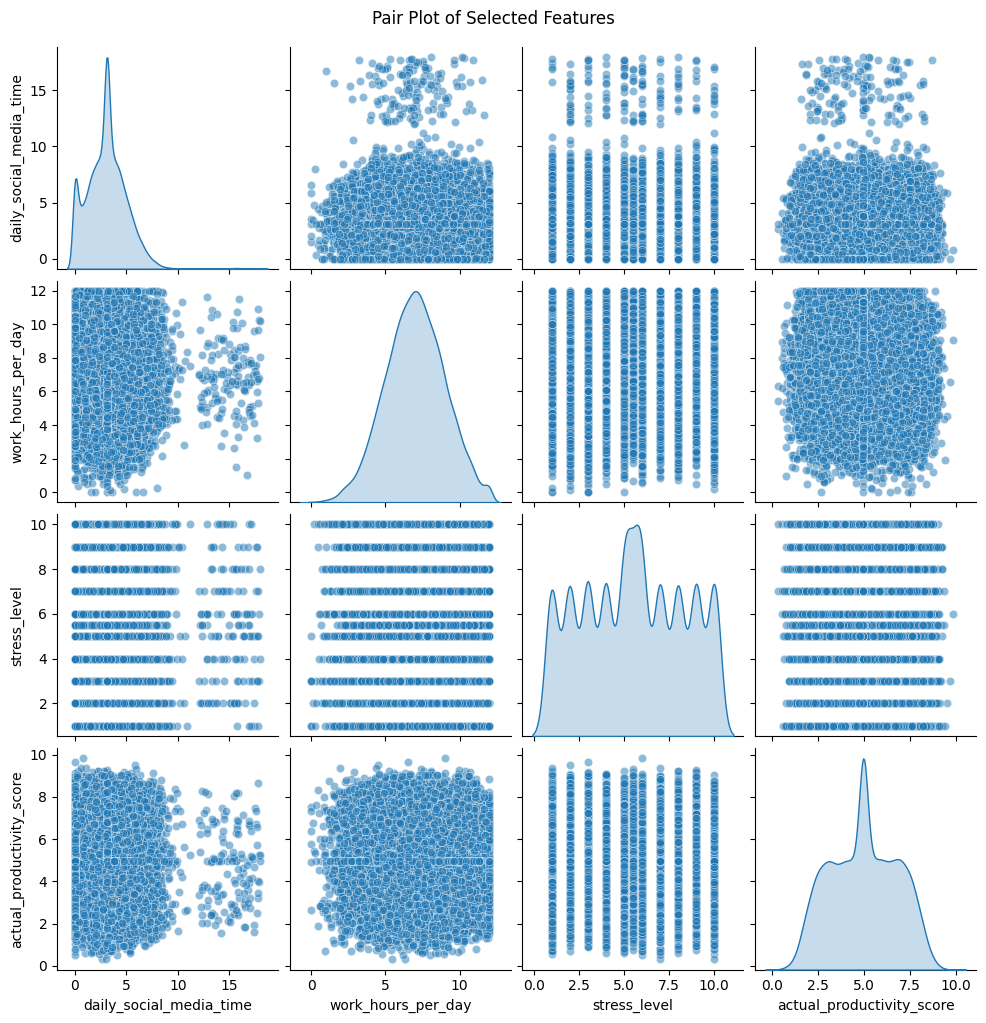

In [28]:
# Pair Plot for a selection of features (using a subset to avoid clutter)
selected_features = ['daily_social_media_time', 'work_hours_per_day', 'stress_level', 'actual_productivity_score']
sns.pairplot(data[selected_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

R2 Score: 0.651
Mean Squared Error: 1.130


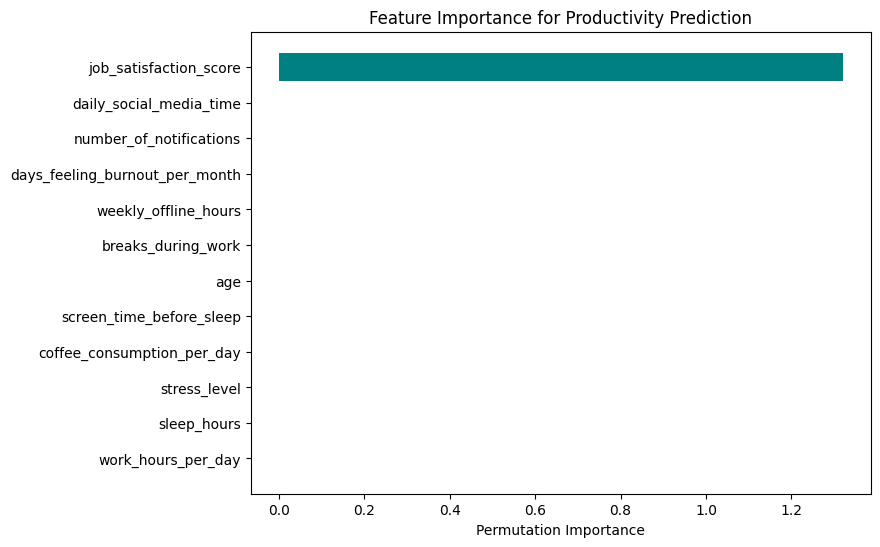

In [32]:
# Define features and target column for prediction
feature_cols = [
    'age', 'daily_social_media_time', 'number_of_notifications',
    'work_hours_per_day', 'stress_level', 'sleep_hours', 'screen_time_before_sleep',
    'breaks_during_work', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
    'weekly_offline_hours', 'job_satisfaction_score'
]

# In case some of these features are still missing or non-numeric, ensure they are imputed or converted
X = data[feature_cols]
y = data['actual_productivity_score']

# Split the data into train and test sets, using a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using R2 Score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# Permutation Importance Visualization
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE)
perm_sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_cols)[perm_sorted_idx], result.importances_mean[perm_sorted_idx], color='teal')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for Productivity Prediction')
plt.show()

In [31]:
# For reproducibility
RANDOM_STATE = 42
